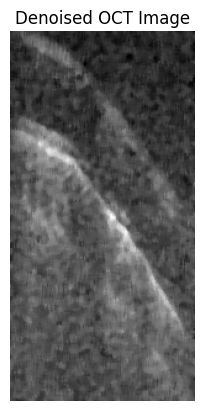

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/kaggle/input/octtestdata/ICIP_test_data_final/RawDataQA (1)/(1).tif', cv2.IMREAD_GRAYSCALE)

# Step 1: Apply Median Blurring to remove salt-and-pepper noise
median_blurred_image = cv2.medianBlur(image, 5)

# Step 2: Apply Non-Local Means Denoising
denoised_image = median_blurred_image 

# Save the final denoised image
cv2.imwrite('denoised_oct_image.jpg', denoised_image)

# Display the final denoised image using matplotlib
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised OCT Image')
plt.axis('off')  # Hide axis
plt.show()


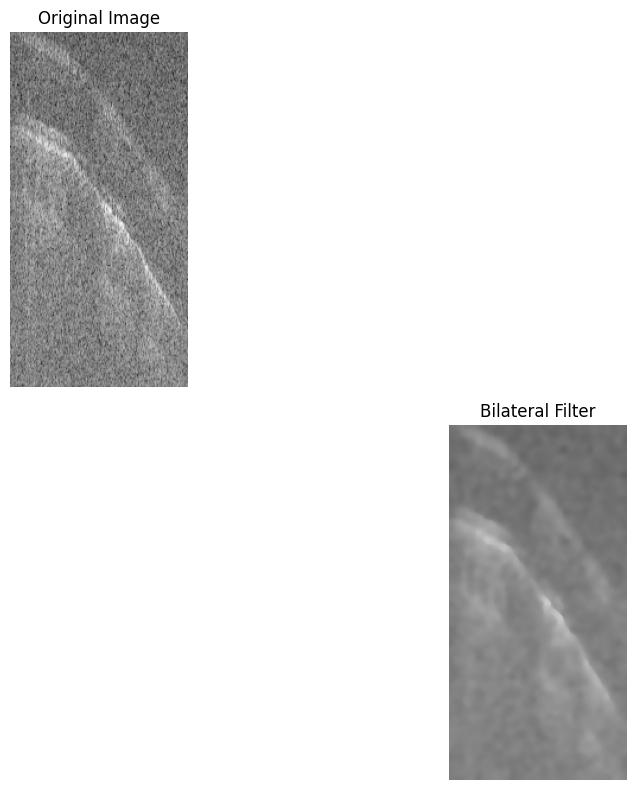

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load an image
img = cv2.imread('/kaggle/input/octtestdata/ICIP_test_data_final/RawDataQA (1)/(1).tif')

# Check if image loading is successful
if img is None:
    print('Error: Could not open or find the image.')
else:
   

    # Apply Median blur
    blurred_median = cv2.medianBlur(img, 5)

    # Apply Bilateral filter
    denoised_bilateral = cv2.bilateralFilter(blurred_median, 9, 75, 75)

    # Display original and denoised images using Matplotlib
    plt.figure(figsize=(10, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

  
    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(denoised_bilateral, cv2.COLOR_BGR2RGB))
    plt.title('Bilateral Filter')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

  
    cv2.imwrite('output_bilateral_filter.jpg', denoised_bilateral)


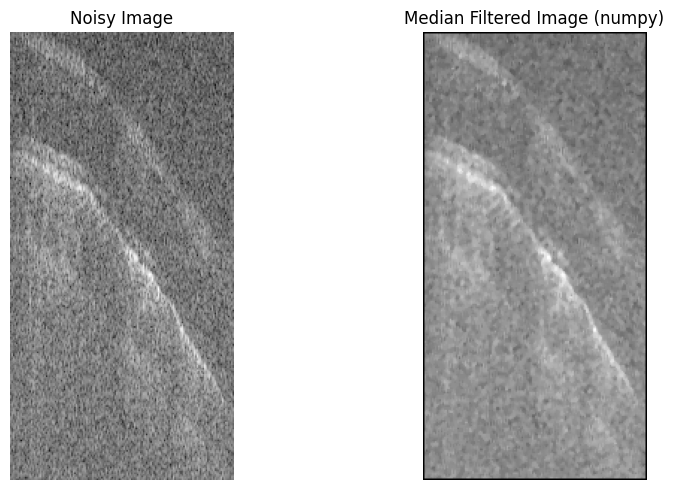

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte

# Load the noisy image
image = io.imread('/kaggle/input/octtestdata/ICIP_test_data_final/RawDataQA (1)/(1).tif')

# Convert the image to uint8 (if necessary)
image = img_as_ubyte(image)

# Define a function for median filtering using numpy
def median_filter_numpy(image, size=3):
    pad = size // 2
    filtered_image = np.zeros_like(image)
    for i in range(pad, image.shape[0] - pad):
        for j in range(pad, image.shape[1] - pad):
            filtered_image[i, j] = np.median(image[i-pad:i+pad+1, j-pad:j+pad+1])
    return filtered_image

# Apply median filtering
filtered_image = median_filter_numpy(image, size=3)  # Adjust size as needed (typically an odd integer)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Median Filtered Image (numpy)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import cv2
import matplotlib.pyplot as plt
import os

def denoise_images(input_dir, output_dir):
    """
    Denoises images using Median and Bilateral filters and saves them.

    Parameters:
    input_dir (str): Directory containing the input images.
    output_dir (str): Directory to save the denoised images.
    """
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg', '.tif')):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)

                if img is None:
                    print(f'Error: Could not open or find the image {img_path}.')
                    continue
                
                # Apply Median blur
                blurred_median = cv2.medianBlur(img, 5)

                # Apply Bilateral filter
                denoised_bilateral = cv2.bilateralFilter(blurred_median, 9, 75, 75)

                # Create output path
                relative_path = os.path.relpath(root, input_dir)
                output_path = os.path.join(output_dir, relative_path)

                # Ensure output directory exists
                os.makedirs(output_path, exist_ok=True)

                # Save denoised image
                output_file_path = os.path.join(output_path, file)
                cv2.imwrite(output_file_path, denoised_bilateral)
                print(f'Saved denoised image to {output_file_path}')

    print('Denoising process completed.')

# Example usage
input_directory = '/kaggle/input/octtestdata/ICIP_test_data_final'
output_directory = 'denoised_images'
denoise_images(input_directory, output_directory)


Saved denoised image to denoised_images/RawDataQA (8)/(176).tif
Saved denoised image to denoised_images/RawDataQA (8)/(117).tif
Saved denoised image to denoised_images/RawDataQA (8)/(180).tif
Saved denoised image to denoised_images/RawDataQA (8)/(122).tif
Saved denoised image to denoised_images/RawDataQA (8)/(79).tif
Saved denoised image to denoised_images/RawDataQA (8)/(162).tif
Saved denoised image to denoised_images/RawDataQA (8)/(198).tif
Saved denoised image to denoised_images/RawDataQA (8)/(133).tif
Saved denoised image to denoised_images/RawDataQA (8)/(111).tif
Saved denoised image to denoised_images/RawDataQA (8)/(154).tif
Saved denoised image to denoised_images/RawDataQA (8)/(165).tif
Saved denoised image to denoised_images/RawDataQA (8)/(123).tif
Saved denoised image to denoised_images/RawDataQA (8)/(57).tif
Saved denoised image to denoised_images/RawDataQA (8)/(183).tif
Saved denoised image to denoised_images/RawDataQA (8)/(16).tif
Saved denoised image to denoised_images/Raw